In [1]:
#importing all the libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew, norm
from scipy.stats import boxcox_normmax
from scipy.special import boxcox1p

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import (VarianceThreshold, SelectPercentile, 
                                       mutual_info_regression)
from sklearn.model_selection import (train_test_split, cross_val_score, 
                                     GridSearchCV, RepeatedKFold)
from sklearn.linear_model import (Ridge, RidgeCV, Lasso, LassoCV, ElasticNet,ElasticNetCV,
                                 LassoLarsCV, LinearRegression)
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from mlxtend.regressor import StackingCVRegressor

In [55]:
#loading the dataset

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
copy = df_train.copy()
sale_price = df_train.pop('SalePrice')
sale_price

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [52]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [4]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [7]:
# missing data

columns_count = len(df_train.columns)
pd.options.display.max_rows = columns_count
df_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

We have lots of missing data

<AxesSubplot:>

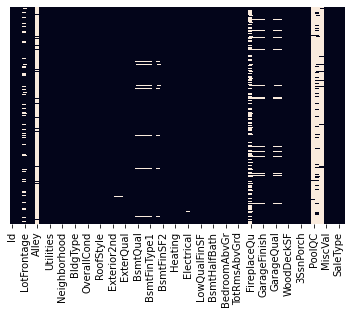

In [8]:
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False)

In [9]:
column_count = len(df_test.columns)
pd.options.display.max_rows = column_count
df_test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [10]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

C:\Users\lenovo\anaconda31\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'House price spread'}, ylabel='SalePrice'>

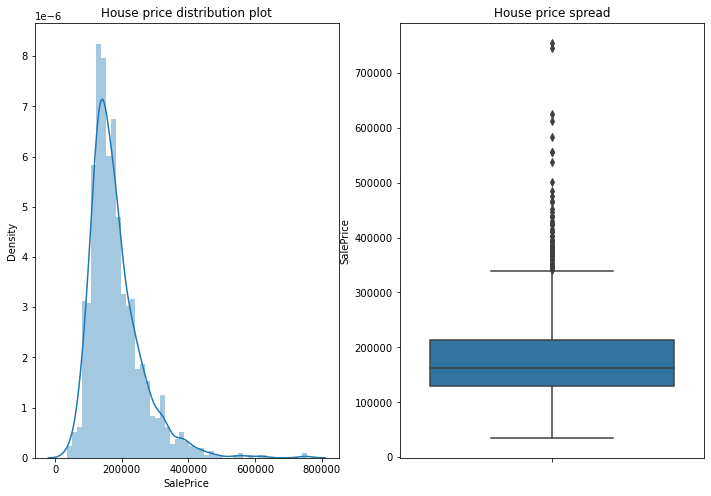

In [11]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.title('House price distribution plot')
sns.distplot(sale_price)

plt.subplot(1,2,2)
plt.title('House price spread')
sns.boxplot(y=sale_price)

So our sale price is right skewed.

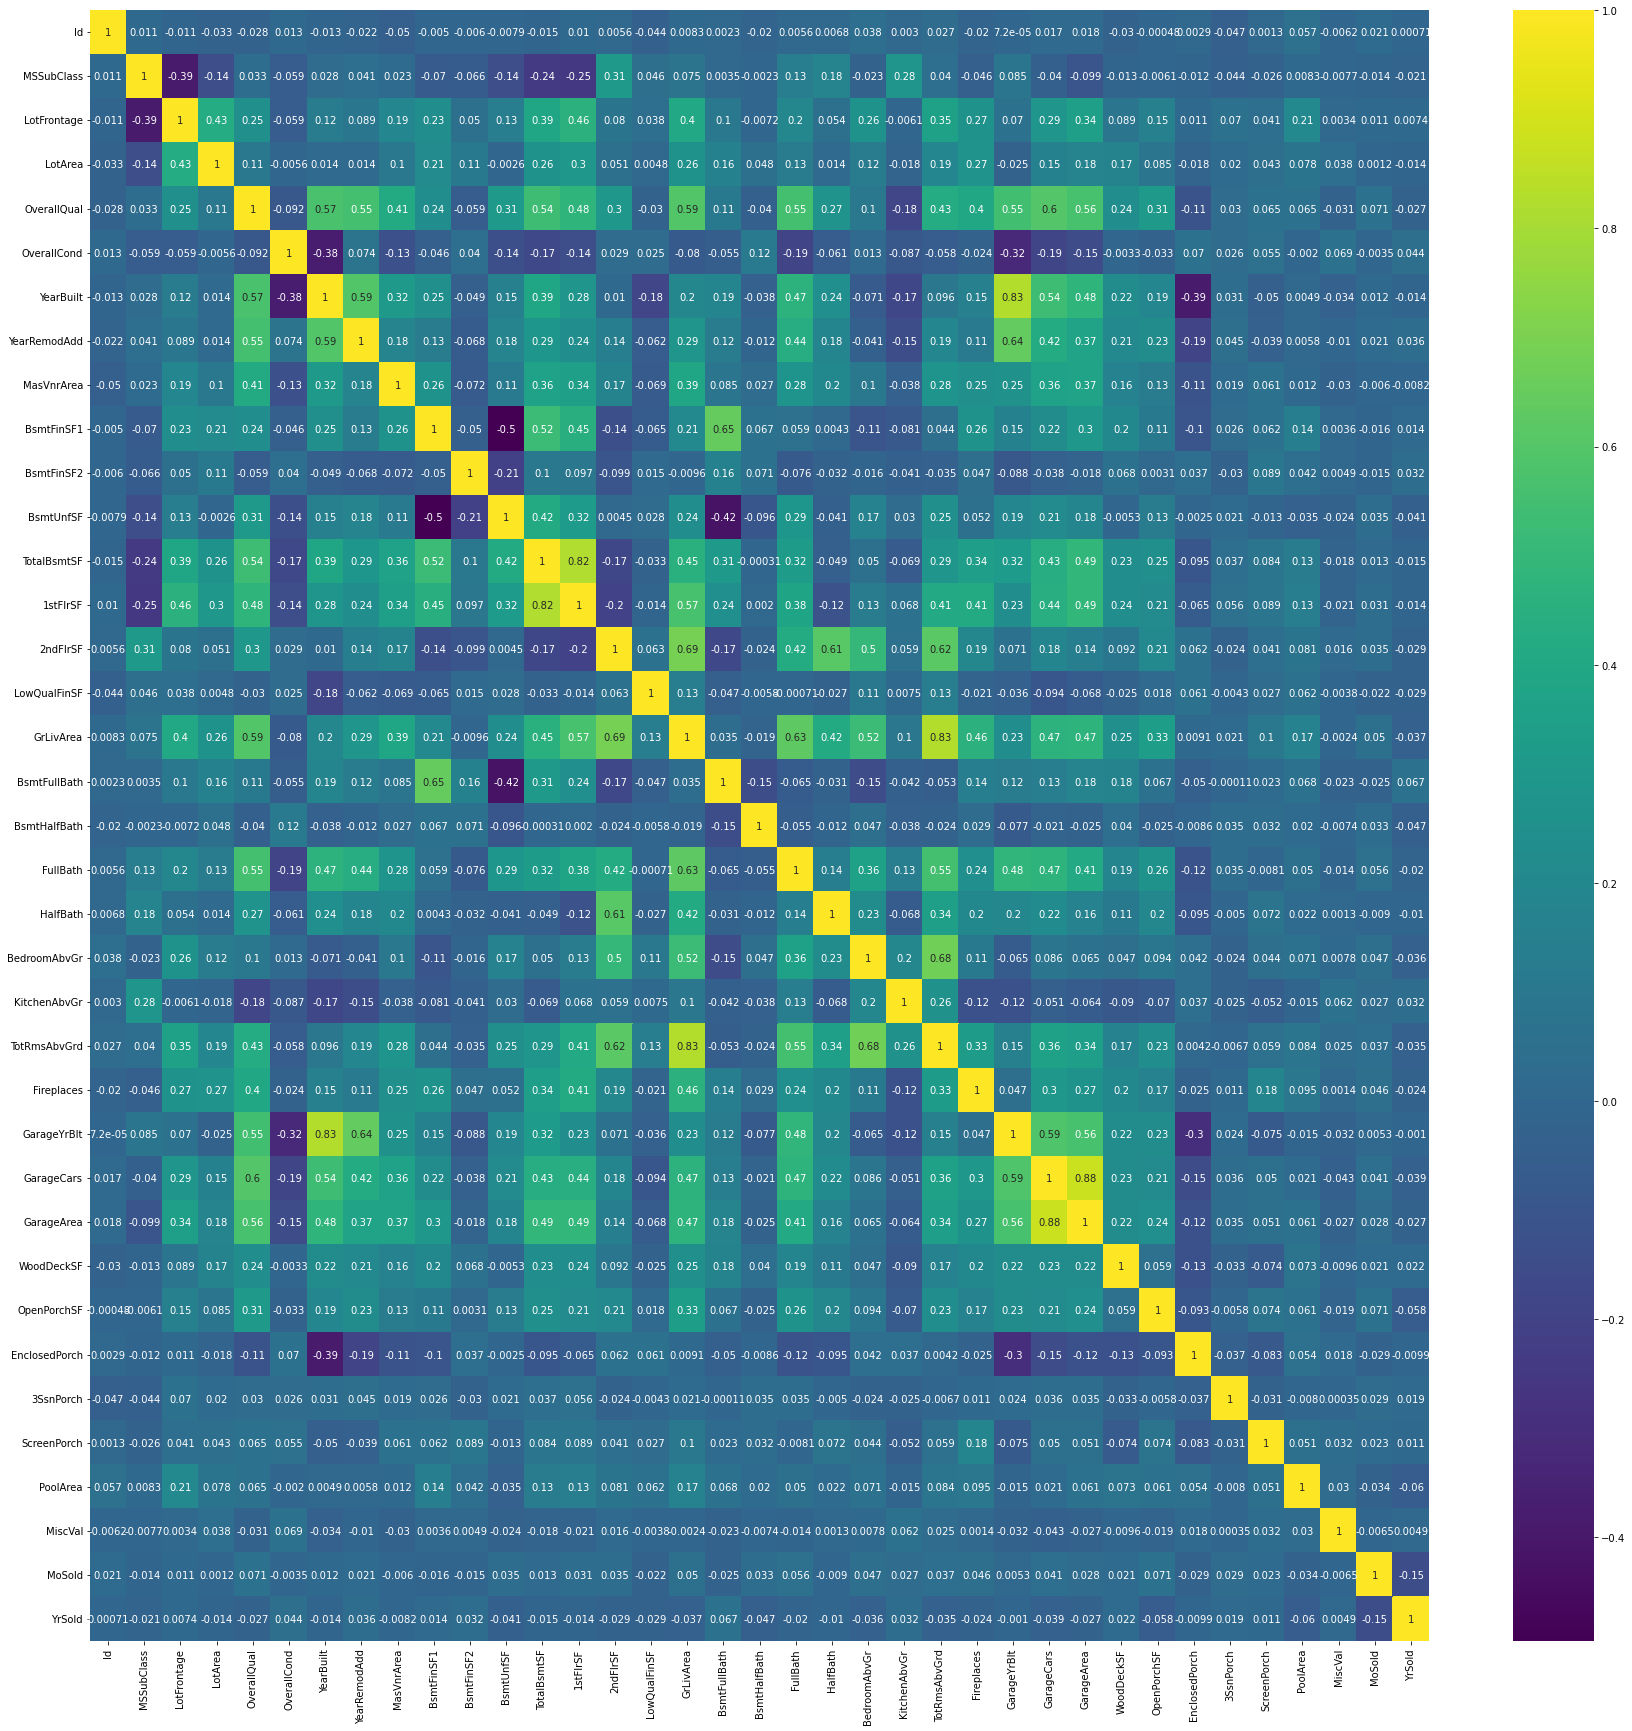

In [12]:
#checking the correlation
plt.figure(figsize=(30,30))
sns.heatmap(df_train.corr(), annot=True, cmap='viridis');

In [13]:
#Handling missing data

In [56]:
#creating function to find the missing data

def missing_data(df):
    missing_count = df.isna().sum().sort_values(ascending=False)
    missing_percent = (100 * df.isna().sum().sort_values(ascending=False))/len(df)
    
    missing_count = pd.DataFrame(missing_count[missing_count>0])
    missing_percent = pd.DataFrame(missing_percent[missing_percent>0])
    
    missing_table = pd.concat([missing_count, missing_percent], axis=1)
    missing_table.columns = ['missing_count', 'missing_percent']
    
    return missing_table

In [57]:
#train

percent_nan_train= missing_data(df_train)
percent_nan_train

,missing_count,missing_percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [58]:
percent_nan_train_list = list(percent_nan_train.index)
percent_nan_train_list

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'LotFrontage',
 'GarageCond',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtCond',
 'BsmtQual',
 'BsmtFinType1',
 'MasVnrArea',
 'MasVnrType',
 'Electrical']

In [59]:
#test

percent_nan_test = missing_data(df_test)
percent_nan_test

,missing_count,missing_percent
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageCond,78,5.346127
GarageQual,78,5.346127
GarageYrBlt,78,5.346127
GarageFinish,78,5.346127


In [60]:
percent_nan_test_list = list(percent_nan_test.index)
percent_nan_test_list

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'LotFrontage',
 'GarageCond',
 'GarageQual',
 'GarageYrBlt',
 'GarageFinish',
 'GarageType',
 'BsmtCond',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'MasVnrType',
 'MasVnrArea',
 'MSZoning',
 'BsmtHalfBath',
 'Utilities',
 'Functional',
 'BsmtFullBath',
 'BsmtFinSF2',
 'BsmtFinSF1',
 'Exterior2nd',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'SaleType',
 'Exterior1st',
 'KitchenQual',
 'GarageArea',
 'GarageCars']

In [61]:
print(f'Test variables with missing value but not in train: \n {[ele for ele in percent_nan_test_list if not ele in percent_nan_train_list]}')
print(f'Train variables with missing value but not in test: \n {[ele for ele in percent_nan_train_list if not ele in percent_nan_test_list]}')
print(f'Variables with missing value common to train n test: \n {[ele for ele in percent_nan_test_list if ele in percent_nan_train_list]}')

Test variables with missing value but not in train: 
 ['MSZoning', 'BsmtHalfBath', 'Utilities', 'Functional', 'BsmtFullBath', 'BsmtFinSF2', 'BsmtFinSF1', 'Exterior2nd', 'BsmtUnfSF', 'TotalBsmtSF', 'SaleType', 'Exterior1st', 'KitchenQual', 'GarageArea', 'GarageCars']
Train variables with missing value but not in test: 
 ['Electrical']
Variables with missing value common to train n test: 
 ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'GarageCond', 'GarageQual', 'GarageYrBlt', 'GarageFinish', 'GarageType', 'BsmtCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MasVnrArea']


In [62]:
#dropping variables which have null values in test but not in train for ease of working and symmetry 

var = [ele for ele in percent_nan_test_list if not ele in percent_nan_train_list]

df_train.drop(var, axis=1, inplace = True)
df_train.reset_index(inplace=True)

df_test.drop(var, axis=1, inplace = True)
df_test.reset_index(inplace=True)

In [63]:
print(df_train.shape)
print(df_test.shape)

(1460, 66)
(1459, 66)


Thus we will have to check each column, since we have lots of NaN.
We have to figure whether data is missing or just that facility is not available in that housing lot.

In [22]:
def missing_impute(df):
    '''
    We are operating under the assumptio. that the nan values are nothing more
    than the 'NA' value present in the data description, and imputing based on
    this assumption
    '''

    '''def replace_by_nan(feature):
        df_train[feature] = np.where(df_train[feature].isnull(), 'None',
                                       df_train[feature])
    def replace_by_mean(feature):
        df_train['feature'] = np.where(df_train['feature'].isnull(), 
                                       df_train['feature'].mean(), 
                                       df_train['feature'])
    def replace_by_mode(feature):
        df_train['feature'] = df_train['feature'].replace(np.NaN, df_train["feature"].mode()[0][:])
    '''
   
    ###categorical columns    

    #data with large chunks of missing value
    max_missing_feats = ['Alley', 'MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu']

    #for grage categorical features
    garage_feats = ['GarageCond', 'GarageQual', 'GarageFinish', 'GarageType']

    #basement categorical columns
    bsmt_feats = ['BsmtCond','BsmtQual','BsmtExposure','BsmtFinType1',
                    'BsmtFinType2']
    #others
    other_feat = ['MasVnrType']

    #fill_by_mode
    mode_feat = ['Electrical']

    a=max_missing_feats+garage_feats+bsmt_feats+other_feat
    for feat in a:
        df.loc[:,feat] = df.loc[:,feat].fillna('None')

    for feat in mode_feat:
        df.loc[:,feat] = df.loc[:,feat].fillna(df.loc[:,feat].mode()[0])

    ### numerical columns

    num_feats = ['GarageYrBlt', 'MasVnrArea']
    for feat in num_feats:
        df.loc[:,feat] = df.loc[:,feat].fillna(df.loc[:,feat].mean())
        
    #lost frontage
    df.groupby('Neighborhood')['LotFrontage'].mean()    
    
    '''To achieve the intended result(i.e use the values above)
    we use 'transform' method'''

    df.loc[:,'LotFrontage']=df.groupby('Neighborhood')['LotFrontage'].transform(
    lambda value: value.fillna(value.mean()))
    
    return df

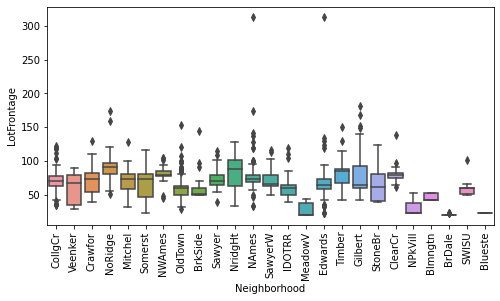

In [23]:
#lot frontage
'''operate under the assumption that lot frontage is related to what
neighborhood a house is in'''

plt.figure(figsize=(8,4))
sns.boxplot(x='Neighborhood', y='LotFrontage', data=df_train)
plt.xticks(rotation=90)
plt.show()

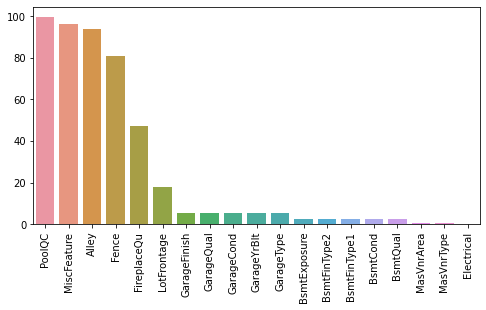

In [24]:
percent_nan = missing_data(df_train)
lol = percent_nan[percent_nan['missing_count']>0]

plt.figure(figsize = (8,4))
sns.barplot(x=lol.index, y=lol.values[:,1])
plt.xticks(rotation=90)
plt.show()

Now we are free of any missing data i.e. nothing is missing

In [25]:
#performing encoding so that our model can work its magic

In [26]:
def categorical_encoding(df):
    
    import pandas as pd
    #Since MSSubClass is a categorical feature, but recognised as int
    df.loc[:,'MSSubClass'] =  df.loc[:,'MSSubClass'].apply(str)
    cat_features = list(df.select_dtypes(include='object').columns)
    
    #features in diff cols
    '''for col in cat_features:
        print(col,'  ', df[col].unique())
'''
    #viewing features with large number of categories
    '''for col in cat_features:
        print(col,'  ',len(df[col].unique()), 'labels')
'''
    #imputing features with large no of categories
    #filtering to avoid the cure of dimensionality

    feat_top_10 = ['Neighborhood','Condition2', 'Condition1']
    feat_top_5 = ['HouseStyle','RoofMatl']
    
    #one hot encoding for nominal categorical features
    feat_one_hot = ['MSSubClass', 'Street','LotShape', 'LandContour', 'LotConfig','LandSlope', 'BldgType',
                    'RoofStyle', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir','Electrical',
                    'GarageType', 'PavedDrive', 'SaleCondition','GarageFinish','Fence','Alley','MiscFeature',
                    'BsmtExposure','GarageYrBlt', 'BsmtFinType1','BsmtFinType2']
    
    # label encoding for ordinal categorical features
    ordinal_feat = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                    'HeatingQC', 'GarageQual', 'GarageCond',
                    'PoolQC','FireplaceQu']
    
   
    for feat in feat_top_10:
        top_10 = [x for x in df[feat].value_counts().sort_values(
            ascending=False).head(10).index]
        for label in top_10:
            df.loc[:,feat+'_'+label]=np.where(df.loc[:,feat]==label, 1, 0)

    for feat in feat_top_5:
        top_5 = [x for x in df[feat].value_counts().sort_values(
            ascending=False).head(10).index]
        for label in top_5:
            df.loc[:,feat+'_'+label]=np.where(df.loc[:,feat]==label, 1, 0)
            
    def dummies(x, df1):
        temp = pd.get_dummies(df1[x], prefix=x, drop_first=True).astype('int32')
        df1 = pd.concat([df1, temp], axis=1)
        df1.drop([x], axis=1, inplace=True)
        return df1

    for feat in feat_one_hot:
        df = dummies(feat, df)
    
    
    le=LabelEncoder()
    for feat in ordinal_feat:
        df.loc[:,feat]=le.fit_transform(df.loc[:,feat])

    df.drop(columns=feat_top_5, inplace=True)
    df.drop(columns=feat_top_10, inplace=True)
    return df

Ordinal Cat:  'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond'

Nominal Categorical features: 'MSZoning','Street','LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'BldgType', 'RoofStyle', 'MasVnrType', 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir','Electrical','Functional', 'GarageType', 'PavedDrive', 'SaleCondition'

In [27]:
#features with large number of categories

'''for col in cat_features:
    print(col,'  ',len(df_train[col].unique()), 'labels')'''

"for col in cat_features:\n    print(col,'  ',len(df_train[col].unique()), 'labels')"

Features with large number of categories: 'Neighborhood', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Condition1', 'Condition2', 'HouseStyle', 'RoofMatl'

In [28]:
### Performing feature selection to avoid noise in our data

In [29]:
def feature_Selection(df, sale_price):
    
    num_features = list(df.select_dtypes(include=('int64','float64')).columns)

    ###dropping constant features using variance threshold
    
    var_thre = VarianceThreshold(threshold=0)
    var_thre.fit(df[num_features])

    const_columns = [col for col in num_features if col not in 
                     df[num_features].columns[var_thre.get_support()]]
    print('No of constant columns:',len(const_columns))


    ###using correlation coeffiecient, to avoid duplicacy


    df_num = df[num_features]
   
    #finding how many features are related to each other

    def correlation(df1, threshold):
        corr_col = set() #to avoid duplicacy
        corr_matrix = df1.corr()
        for i in range(len(corr_matrix.columns)):
            for j in range(i):
                if corr_matrix.iloc[i,j]>threshold:
                    colname = corr_matrix.columns[i]
                    corr_col.add(colname)
        return corr_col

    correlated_features = correlation(df_num, 0.7)
    len(correlated_features)
    print(correlated_features)
    
    ###using information gain, mutual information is synonym to IG
    
    mutual_info = mutual_info_regression(df_num, sale_price)
    mutual_info = pd.Series(mutual_info)
    mutual_info.index = df_num.columns
    mutual_info.sort_values(ascending=False)

    

    selected_top_cols = SelectPercentile(mutual_info_regression, percentile=40)
    selected_top_cols.fit(df_num, sale_price)

    selected_top_cols.get_support()

    unimp_cols = [col for col in num_features if col not in df_num.columns
                 [selected_top_cols.get_support()]]
    
    test_drop = list(correlated_features)+unimp_cols
    
    #dropping correlated features n unimp cols
    df.drop(test_drop, axis=1, inplace=True)
    return df, test_drop

[Text(0.5, 1.0, 'Numeric Distribution of Features')]

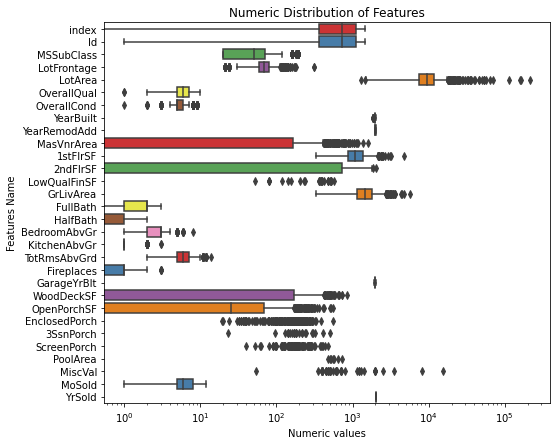

In [31]:
#creating box plots for all numeric columns

num_cols = list(df_train.select_dtypes(include=('int64','float64')).columns)

f, ax = plt.subplots(figsize=(8,7))
ax.set_xscale('log')
ax = sns.boxplot(data=df_train[num_cols], orient='h', palette='Set1')
ax.xaxis.grid(False)
ax.set(ylabel='Features Name')
ax.set(xlabel='Numeric values')
ax.set(title='Numeric Distribution of Features')
#sns.despine(trim=True, left=True)

Text(0.5, 1.0, 'price')

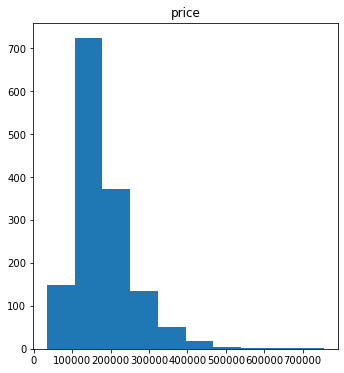

In [32]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.hist(sale_price)
plt.title('price')

In [ ]:
#using correlation coeffiecient, to avoid duplicacy

'''df_num = df_train[num_features]
df_num.pop('SalePrice')
#checking the correlation
plt.figure(figsize=(30,30))
sns.heatmap(df_num.corr(), annot=True, cmap='viridis');'''

In [ ]:
#print correlated features
correlated_features

In [38]:
#using information gain, mutual information is synonym to IG

num_features = list(df_train.select_dtypes(include=('int64','float64')).columns)
df_num = df_train[num_features]

from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(df_num, sale_price)
mutual_info = pd.Series(mutual_info)
mutual_info.index = df_num.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.579311
GrLivArea        0.479321
YearBuilt        0.367873
1stFlrSF         0.309373
FullBath         0.265184
YearRemodAdd     0.250422
LotFrontage      0.231630
TotRmsAbvGrd     0.222652
2ndFlrSF         0.197512
Fireplaces       0.161441
LotArea          0.157645
OpenPorchSF      0.153337
WoodDeckSF       0.111674
OverallCond      0.110524
MasVnrArea       0.103221
HalfBath         0.084493
BedroomAbvGr     0.072406
EnclosedPorch    0.019544
KitchenAbvGr     0.012559
LowQualFinSF     0.007312
MiscVal          0.003313
ScreenPorch      0.002847
Id               0.000000
YrSold           0.000000
MoSold           0.000000
3SsnPorch        0.000000
PoolArea         0.000000
index            0.000000
dtype: float64

<AxesSubplot:>

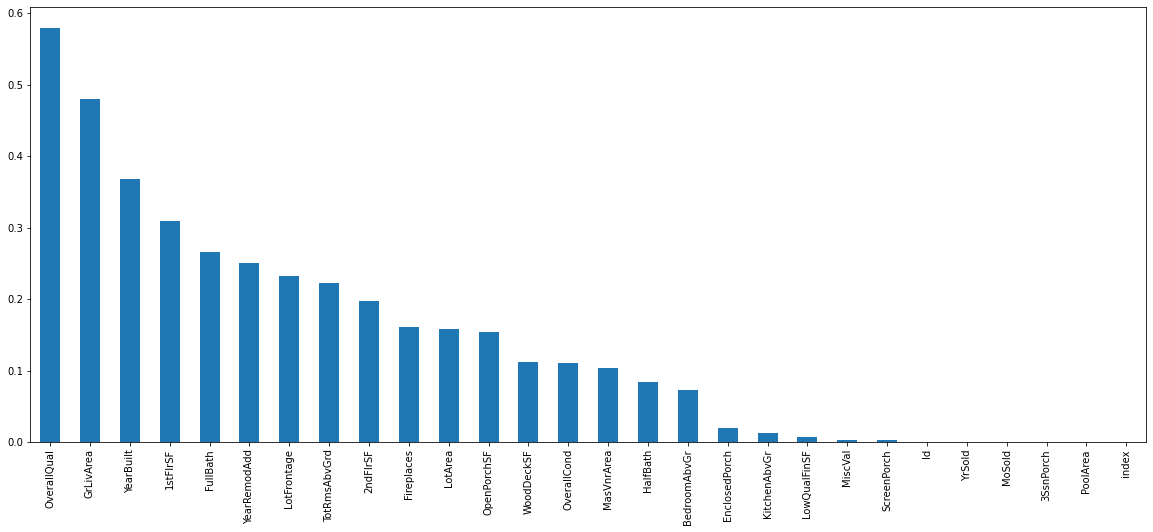

In [39]:
#plotting
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [41]:
selected_top_cols = SelectPercentile(mutual_info_regression, percentile=40)
selected_top_cols.fit(df_num, sale_price)
selected_top_cols.get_support()

array([False, False,  True,  True,  True, False,  True,  True, False,
        True,  True, False,  True,  True, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False])

In [42]:
df_num.columns[selected_top_cols.get_support()]

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
       'Fireplaces'],
      dtype='object')

In [43]:
unimp_cols = [col for col in num_features if col not in df_num.columns
             [selected_top_cols.get_support()]]
print(unimp_cols)

['index', 'Id', 'OverallCond', 'MasVnrArea', 'LowQualFinSF', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [ ]:
### Normalizing our dataset

Normally distributed features are an assumption in Statistical algorithms.Transformation is required to treat the skewed features and make them normally distributed. Right skewed features can be transformed to normality with Square Root/ Cube Root/ Logarithm transformation.

*For normally distributed data the skewness should be around 0.

*A skewness value greater than zero means that there is more weight in the right tail of the distribution.

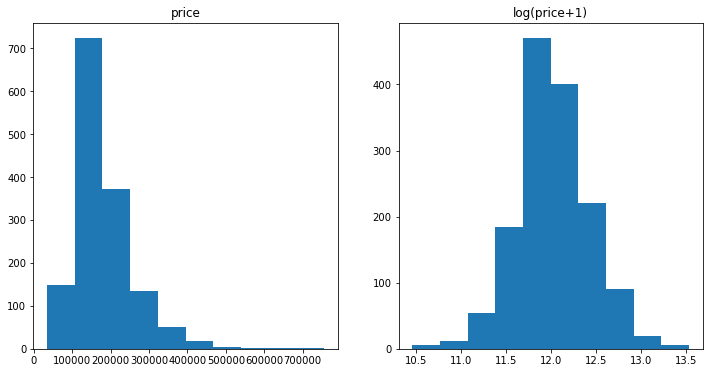

In [44]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.hist(sale_price)
plt.title('price')

plt.subplot(1,2,2)
plt.hist(np.log1p(sale_price))
plt.title('log(price+1)')

plt.show()

[Text(0.5, 1.0, 'Numeric Distribution of Features')]

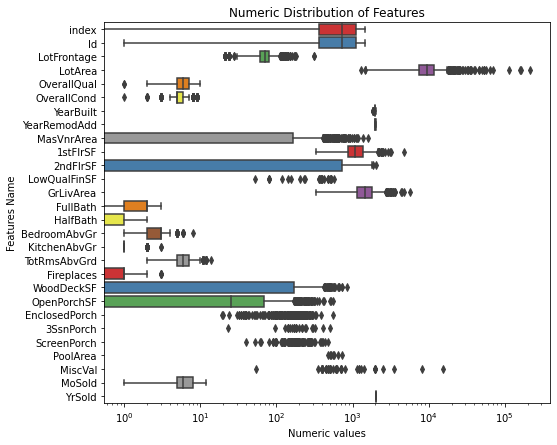

In [45]:
#creating box plots for all numeric columns

num_cols = list(df_train.select_dtypes(include=('int64','float64')).columns)

f, ax = plt.subplots(figsize=(8,7))
ax.set_xscale('log')
ax = sns.boxplot(data=df_train[num_cols], orient='h', palette='Set1')
ax.xaxis.grid(False)
ax.set(ylabel='Features Name')
ax.set(xlabel='Numeric values')
ax.set(title='Numeric Distribution of Features')
#sns.despine(trim=True, left=True)

In [ ]:
'''import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":sale_price, "log(price + 1)":np.log1p(sale_price)})
prices.hist()'''

In [46]:
def normalization(df, sale_price):
    '''#skew and kurtosis of sale price

    print('Skewness: %f' % sale_price.skew())
    print('Kurtosis: %f' % sale_price.kurt())

    #applying log transformation to remove skewness since its right skewed

    sale_price = np.log1p(sale_price)'''

    #finding skewed numerical cols
    
    num_features = list(df.select_dtypes(include=('int64','float64')).columns)
    skews_column = df[num_features].apply(lambda x: skew(x)).sort_values(
        ascending=False)
    high_skew = skews_column[skews_column>0.5]
    skew_index = high_skew.index

    print(f'There are {high_skew.shape[0]} numerical features with Skew  > 0.5')
    skews_column

    #normalizing skewed features
    for i in skew_index:
        df[i] = boxcox1p(df[i], boxcox_normmax(df[i]+1))
        
    return df, sale_price

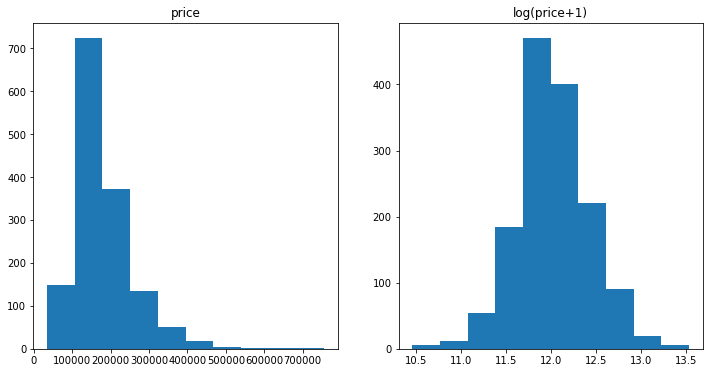

In [47]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.hist(sale_price)
plt.title('price')

plt.subplot(1,2,2)
plt.hist(np.log1p(sale_price))
plt.title('log(price+1)')

plt.show()

[Text(0.5, 1.0, 'Numeric Distribution of Features')]

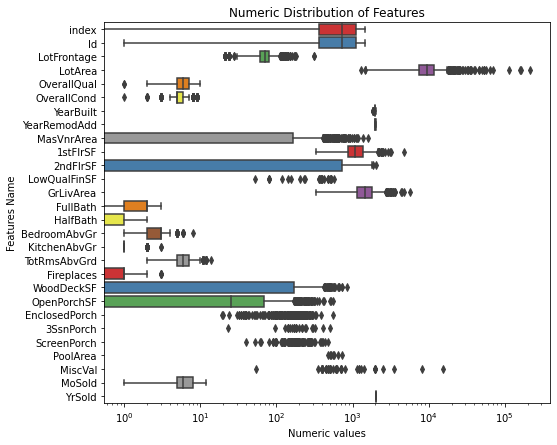

In [48]:
#creating box plots for all numeric columns

num_cols = list(df_train.select_dtypes(include=('int64','float64')).columns)

f, ax = plt.subplots(figsize=(8,7))
ax.set_xscale('log')
ax = sns.boxplot(data=df_train[num_cols], orient='h', palette='Set1')
ax.xaxis.grid(False)
ax.set(ylabel='Features Name')
ax.set(xlabel='Numeric values')
ax.set(title='Numeric Distribution of Features')
#sns.despine(trim=True, left=True)

In [ ]:
df_train.head()

In [ ]:
###Creating a pipddeline

In [ ]:
prepared

In [64]:
#getting our final train data

df_train=missing_impute(df_train)
df_train = categorical_encoding(df_train)

#df_train.drop(['index', 'Id'],axis=1, inplace=True)

df_train, unimp_cols = feature_Selection(df_train, sale_price)
df_train, sale_price = normalization(df_train, sale_price)

No of constant columns: 0
{'Id', 'TotRmsAbvGrd'}
There are 6 numerical features with Skew  > 0.5


C:\Users\lenovo\anaconda31\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\lenovo\anaconda31\lib\site-packages\scipy\stats\stats.py:4053: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


In [65]:
pd.options.display.max_rows = len(df_train.columns)
df_train.head().T

,0,1,2,3,4
LotFrontage,10.619362,11.719304,10.850673,10.219178,11.991274
LotArea,8.670457,8.787629,8.933084,8.782836,9.150118
OverallQual,7.000000,6.000000,7.000000,7.000000,8.000000
YearBuilt,2003.000000,1976.000000,2001.000000,1915.000000,2000.000000
YearRemodAdd,2003.000000,1976.000000,2002.000000,1970.000000,2000.000000
ExterQual,2.000000,3.000000,2.000000,3.000000,2.000000
ExterCond,4.000000,4.000000,4.000000,4.000000,4.000000
BsmtQual,2.000000,2.000000,2.000000,4.000000,2.000000
BsmtCond,4.000000,4.000000,4.000000,1.000000,4.000000
HeatingQC,0.000000,0.000000,0.000000,2.000000,0.000000


In [66]:
unimp_cols

['Id',
 'TotRmsAbvGrd',
 'index',
 'Id',
 'OverallCond',
 'MasVnrArea',
 'LowQualFinSF',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [67]:
#Getting our final test data

df_test=missing_impute(df_test)
df_test = categorical_encoding(df_test)

#df_test.drop(['index', 'Id'],axis=1, inplace=True)
df_test.drop(unimp_cols, axis=1, inplace=True)

#finding skewed numerical cols
num_features = list(df_test.select_dtypes(include=('int64','float64')).columns)
skews_column = df_test[num_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skews_column[skews_column>0.5]
skew_index = high_skew.index

print(f'There are {high_skew.shape[0]} numerical features with Skew  > 0.5')
skews_column

#normalizing skewed features
for i in skew_index:
    df_test[i] = boxcox1p(df_test[i], boxcox_normmax(df_test[i]+1))

There are 6 numerical features with Skew  > 0.5


C:\Users\lenovo\anaconda31\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\lenovo\anaconda31\lib\site-packages\scipy\stats\stats.py:4053: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


In [68]:
df_test.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,...,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf
0,31.830910,50.728200,5,1961,1961,3,4,4,4,4,...,0,0,1,0,0,0,1,0,0,0
1,32.127056,54.118583,6,1958,1958,3,4,4,4,4,...,0,0,0,0,0,0,0,0,0,1
2,30.032178,53.590854,5,1997,1998,3,4,2,4,2,...,0,0,0,0,0,0,0,0,0,1
3,31.235562,48.336774,6,1998,1998,3,4,4,4,0,...,0,0,0,0,0,0,0,0,0,1
4,19.976097,38.773082,8,1992,1992,2,4,2,4,0,...,0,0,0,0,0,0,0,0,0,1


In [69]:
#our test and train data is still imbalanced
excess_train = [col for col in df_train.columns if not col in df_test.columns]
excess_test = [col for col in df_test.columns if not col in df_train.columns]

print(excess_train)
print(excess_test)

['Neighborhood_NWAmes', 'Condition2_RRNn', 'Condition2_RRAn', 'Condition2_RRAe', 'HouseStyle_2.5Fin', 'RoofMatl_Roll', 'RoofMatl_Membran', 'RoofMatl_ClyTile', 'RoofMatl_Metal', 'Heating_GasA', 'Heating_OthW', 'Electrical_Mix', 'MiscFeature_TenC', 'GarageYrBlt_1906.0', 'GarageYrBlt_1908.0', 'GarageYrBlt_1914.0', 'GarageYrBlt_1929.0', 'GarageYrBlt_1931.0', 'GarageYrBlt_1933.0', 'GarageYrBlt_1978.5061638868744']
['Neighborhood_Mitchel', 'MSSubClass_150', 'GarageYrBlt_1896.0', 'GarageYrBlt_1900.0', 'GarageYrBlt_1917.0', 'GarageYrBlt_1919.0', 'GarageYrBlt_1943.0', 'GarageYrBlt_1977.7212165097756', 'GarageYrBlt_2207.0']


In [70]:
#dropping excess columns in my train data and test data
df_train.drop(excess_train, axis=1, inplace=True)
df_test.drop(excess_test, axis=1, inplace=True)

In [71]:
print(df_train.shape)
print(df_test.shape)

(1460, 235)
(1459, 235)


In [72]:
#our test and train data is now balanced
excess_train = [col for col in df_train.columns if not col in df_test.columns]
excess_test = [col for col in df_test.columns if not col in df_train.columns]

print(excess_train)
print(excess_test)

[]
[]


In [73]:
df_train.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,...,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf
0,10.619362,8.670457,7,2003,2003,2,4,2,4,0,...,0,0,0,0,0,0,0,0,0,1
1,11.719304,8.787629,6,1976,1976,3,4,2,4,0,...,0,0,0,0,0,0,0,0,0,1
2,10.850673,8.933084,7,2001,2002,2,4,2,4,0,...,0,0,0,0,0,0,0,0,0,1
3,10.219178,8.782836,7,1915,1970,3,4,4,1,2,...,0,0,0,0,0,0,0,0,0,1
4,11.991274,9.150118,8,2000,2000,2,4,2,4,0,...,0,0,0,0,0,0,0,0,0,1


Now we can move towards building our model.

In [86]:
#splitting our data

X = df_train
y = sale_price


#first split
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3,
                                                   random_state=42)
#second split
X_eval, X_test, y_eval, y_test = train_test_split(X_other, y_other,
                                                  test_size=0.5,
                                                 random_state=42)

In [87]:
df_test.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,...,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf
0,31.830910,50.728200,5,1961,1961,3,4,4,4,4,...,0,0,1,0,0,0,1,0,0,0
1,32.127056,54.118583,6,1958,1958,3,4,4,4,4,...,0,0,0,0,0,0,0,0,0,1
2,30.032178,53.590854,5,1997,1998,3,4,2,4,2,...,0,0,0,0,0,0,0,0,0,1
3,31.235562,48.336774,6,1998,1998,3,4,4,4,0,...,0,0,0,0,0,0,0,0,0,1
4,19.976097,38.773082,8,1992,1992,2,4,2,4,0,...,0,0,0,0,0,0,0,0,0,1


In [88]:
print(X_test.shape)
print(X_eval.shape)
print(X_train.shape)

(219, 235)
(219, 235)
(1022, 235)


In [78]:
def rmse_cv(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error',
                                   cv=10))
    return(rmse)

In [89]:
#linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
model_pred = lr.predict(X_eval)

print(rmse_cv(lr, X_eval, model_pred).min())
print(mean_absolute_error(y_eval, model_pred))

5706.929830561201
21555.722802972185


In [90]:
accuracy=cross_val_score(estimator=lr, X=X_train, y=y_train, cv=10)
print(f'Accuracy:{accuracy.mean()*100}%')
print(f'Standard Deviation:{accuracy.std()*100}%')

Accuracy:66.8238631506249%
Standard Deviation:11.971122892288477%


In [91]:
#Ridge Regression

In [92]:
alpha_list=[]
mse_list=[]
for alpha in np.arange(0.05, 200):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    alpha_list.append(alpha)
    
    #testing the model
    y_pred = ridge.predict(X_eval)
    mse = mean_absolute_error(y_eval, y_pred)
    mse_list.append(mse)

In [93]:
alpha_list = pd.DataFrame(alpha_list)
mse_list = pd.DataFrame(mse_list)
alpha_mse = pd.concat([alpha_list, mse_list], axis=1)
alpha_mse.columns = ['alpha_list', 'mse_list']

alpha_mse[alpha_mse['mse_list'] == alpha_mse['mse_list'].min()]

,alpha_list,mse_list
18,18.05,19030.375764


In [94]:
#so we have our regularization parameter alpha=40.05
ridge = Ridge(alpha=18.05)
ridge.fit(X_train, y_train)

#evaluating our model
y_pred = ridge.predict(X_eval)
print('Eval')
print(rmse_cv(ridge, X_eval,y_pred).min())
print(mean_absolute_error(y_eval, y_pred))

y_final_pred = ridge.predict(X_test)
print('Testing')
print(rmse_cv(ridge, X_test, y_final_pred).min())
print(mean_absolute_error(y_eval, y_final_pred))

Eval
8729.298067316304
19030.375764469758
Testing
7918.03712535324
74327.96038532065


In [95]:
accuracy=cross_val_score(estimator=ridge, X=X_train, y=y_train, cv=10)
print(f'Accuracy:{accuracy.mean()*100}%')
print(f'Standard Deviation:{accuracy.std()*100}%')

Accuracy:80.53771510330618%
Standard Deviation:6.219583021493827%


In [96]:
#Lasso Regression

In [97]:
alpha_list=[]
mse_list=[]
for alpha in np.arange(0.05, 200):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    alpha_list.append(alpha)
    
    #testing the model
    y_pred = lasso.predict(X_eval)
    mse = mean_absolute_error(y_eval, y_pred)
    mse_list.append(mse)

C:\Users\lenovo\anaconda31\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 328409387939.4794, tolerance: 615098412.8205527
  model = cd_fast.enet_coordinate_descent(
C:\Users\lenovo\anaconda31\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8583820982.075073, tolerance: 615098412.8205527
  model = cd_fast.enet_coordinate_descent(
C:\Users\lenovo\anaconda31\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1019091859.9598389, tolerance: 615098412.8205527
  model = cd_fast.enet_coordinate_descent(


In [98]:
alpha_list = pd.DataFrame(alpha_list)
mse_list = pd.DataFrame(mse_list)
alpha_mse = pd.concat([alpha_list, mse_list], axis=1)
alpha_mse.columns = ['alpha_list', 'mse_list']

alpha_mse[alpha_mse['mse_list'] == alpha_mse['mse_list'].min()]

,alpha_list,mse_list
194,194.05,18348.69044


In [99]:
#so we have our regularization parameter alpha=111.05
lasso = Lasso(alpha=194.05)
lasso.fit(X_train, y_train)

#evaluating our model
y_pred = lasso.predict(X_eval)
print('Eval')
print(rmse_cv(lasso, X_eval, y_pred).min())
print(mean_absolute_error(y_eval, y_pred))

y_final_pred = lasso.predict(X_test)
print('Testing')
print(rmse_cv(lasso, X_eval, y_final_pred).min())
print(mean_absolute_error(y_eval, y_final_pred))

Eval
4120.892466673387
18348.690439929916
Testing
59653.26702918704
75048.7501869865


In [100]:
accuracy=cross_val_score(estimator=lasso, X=X_train, y=y_train, cv=10)
print(f'Accuracy:{accuracy.mean()*100}%')
print(f'Standard Deviation:{accuracy.std()*100}%')

Accuracy:79.51006219268768%
Standard Deviation:7.795383577189699%


In [101]:
#Random Forest REgressor

In [102]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

#eval
y_pred = random_forest.predict(X_eval)
print('Eval')
print(rmse_cv(random_forest, X_eval, y_eval).min())
print(mean_absolute_error(y_eval, y_pred))

#test
y_final_pred = random_forest.predict(X_test)
print('Test')
print(rmse_cv(random_forest, X_test, y_test).min())
print(mean_absolute_error(y_test, y_final_pred))

Eval
17057.388366744086
17628.228767123288
Test
21013.43295124833
18422.44525114155


In [103]:
accuracy=cross_val_score(estimator=random_forest, X=X_train, y=y_train, cv=10)
print(f'Accuracy:{accuracy.mean()*100}%')
print(f'Standard Deviation:{accuracy.std()*100}%')

Accuracy:82.0492305356818%
Standard Deviation:7.402293582242319%


In [104]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [120,130,140], 'max_features': [22, 24, 26]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3,
4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=10,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(-best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 104196544041.02 %
Best Parameters: {'max_features': 26, 'n_estimators': 120}


In [105]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(max_features=26, n_estimators=120)
random_forest.fit(X_train, y_train)

#eval
y_pred = random_forest.predict(X_eval)
print('Eval')
print(rmse_cv(random_forest,X_eval,y_pred).min())
print(mean_absolute_error(y_eval, y_pred))

#test
y_final_pred = random_forest.predict(X_test)
print('Test')
print(rmse_cv(random_forest, X_test, y_final_pred).min())
print(mean_absolute_error(y_test, y_final_pred))

Eval
8200.236385844497
18042.016210045662
Test
8565.397150145396
19163.315639269407


In [106]:
accuracy=cross_val_score(estimator=random_forest, X=X_train, y=y_train, cv=10)
print(f'Accuracy:{accuracy.mean()*100}%')
print(f'Standard Deviation:{accuracy.std()*100}%')

Accuracy:82.68609099913164%
Standard Deviation:5.432490884973553%


In [107]:
import xgboost as xgb
xgboost = xgb.XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)
xgboost.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.6, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=4,
             min_child_weight=0, missing=nan, monotone_constraints='()',
             n_estimators=6000, n_jobs=4, nthread=-1, num_parallel_tree=1,
             random_state=42, reg_alpha=6e-05, reg_lambda=1, scale_pos_weight=1,
             seed=27, subsample=0.7, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [108]:
#eval
y_pred = xgboost.predict(X_eval)
print('Eval')
print(rmse_cv(xgboost, X_eval, y_pred).min())
print(mean_absolute_error(y_eval, y_pred))

#test
y_final_pred = xgboost.predict(X_test)
print('Test')
print(rmse_cv(xgboost, X_test, y_final_pred).min())
print(mean_absolute_error(y_test, y_final_pred))

Eval
9946.46952440915
17110.373376855023
Test
9545.224146137167
17243.66548944064


In [109]:
accuracy=cross_val_score(estimator=xgboost, X=X_train, y=y_train, cv=10)
print(f'Accuracy:{accuracy.mean()*100}%')
print(f'Standard Deviation:{accuracy.std()*100}%')

Accuracy:83.19190133701484%
Standard Deviation:9.550936220260485%


In [110]:
#Elastic net

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RepeatedKFold
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
'''By default, an equal balance of 0.5 is used for “l1_ratio” and a full
weighting of 1.0 is used for alpha.'''
model
#model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
model.fit(X_train, y_train)

ElasticNet()

In [111]:
from numpy import absolute, mean, std
scores = cross_val_score(model, X_train, y_train,
                         scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('MAE: %.3f(%.3f)' % (mean(scores), std(scores)))

MAE: 24365.205(2628.453)


In [112]:
#eval
y_pred = model.predict(X_eval)
print('Eval')
print(rmse_cv(model, X_eval, y_pred).min())
print(mean_absolute_error(y_eval, y_pred))

#test
y_final_pred = model.predict(X_test)
print('Test')
print(rmse_cv(model, X_test, y_final_pred).min())
print(mean_absolute_error(y_test, y_final_pred))

Eval
7411.654693856796
23973.892853260055
Test
7070.5493103951185
27095.33360699021


In [113]:
#hyperparameters

param_grid = [{
    'l1_ratio': np.arange(0, 1, 0.01),
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
}]
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
search = GridSearchCV(model, param_grid, scoring='neg_mean_absolute_error',
                     cv=cv, n_jobs=-1)
search.fit(X_train, y_train)
print('MAE: %.3f' % search.best_score_)
print('Best Params: %s' % search.best_params_)

MAE: -21200.228
Best Params: {'alpha': 0.1, 'l1_ratio': 0.78}


In [115]:
en = ElasticNet(alpha=0.1, l1_ratio=0.78)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
en.fit(X_train, y_train)

scores = cross_val_score(en, X_train, y_train,
                         scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = np.absolute(scores)
print('MAE: %.3f(%.3f)' % (np.mean(scores), np.std(scores)))

MAE: 21200.228(2397.049)


In [116]:
#eval
y_pred = en.predict(X_eval)
print('Eval')
print(rmse_cv(en, X_eval, y_pred).min())
print(mean_absolute_error(y_eval, y_pred))

#test
y_final_pred = en.predict(X_test)
print('Test')
print(rmse_cv(en,X_test, y_final_pred).min())
print(mean_absolute_error(y_test, y_final_pred))

Eval
5247.0231782743185
19064.105398900323
Test
4740.232541760913
23923.308387707068


In [117]:
accuracy=cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)
print(f'Accuracy:{accuracy.mean()*100}%')
print(f'Standard Deviation:{accuracy.std()*100}%')

Accuracy:75.76356445396216%
Standard Deviation:4.890079773835576%


In [118]:
#gradient boost regressor


gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=6000,
                          random_state=42)

In [119]:
#eval
y_pred = gbr.predict(X_eval)
print('Eval')
print(rmse_cv(gbr, X_eval, y_pred).min())
print(mean_absolute_error(y_eval, y_pred))

#test
y_final_pred = gbr.predict(X_test)
print('Test')
print(rmse_cv(gbr, X_test, y_final_pred).min())
print(mean_absolute_error(y_test, y_final_pred))

Eval
7572.5586799462435
16945.378867527143
Test
8584.309572199594
17629.597513144305


In [120]:
accuracy=cross_val_score(estimator=gbr, X=X_train, y=y_train, cv=10)
print(f'Accuracy:{accuracy.mean()*100}%')
print(f'Standard Deviation:{accuracy.std()*100}%')

Accuracy:84.79612709103094%
Standard Deviation:7.447081763761472%


In [128]:
y_pred

array([132445.80657564, 135588.60396855, 335479.89555697, 378423.91182534,
       164420.7070533 , 216513.98327024, 215728.06549873, 171833.74134141,
       112284.39310355, 254080.00837701, 129017.34184071, 212452.89089005,
       127170.80427505, 120782.45884441, 106376.12213982, 166226.48491499,
       253160.93331943, 146075.19911506, 129903.15741383, 137119.51787192,
       142089.52624253, 187830.45819417, 219598.87489544, 140610.42940161,
       153696.52959605, 180140.60984242, 180120.26731344, 139180.42948136,
       146714.83766941, 195311.53883371, 296292.10637214, 116822.51155131,
       114740.26970478, 147064.97930135, 187059.58812558, 332653.53549506,
       142221.8088581 , 173897.49778632, 112398.63900483, 142749.43362369,
       115993.88791194, 231808.61547101, 136761.79597172, 125802.42436729,
       211276.46810964, 126392.8899285 , 355457.59060368, 108551.10131372,
       180579.74353279, 119974.96685407, 119551.75767704, 148291.52990681,
       231466.46218456, 1

In [125]:
gbr.score(y_test.reshape(-1,1), y_final_pred)

AttributeError: 'Series' object has no attribute 'reshape'

C:\Users\lenovo\anaconda31\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

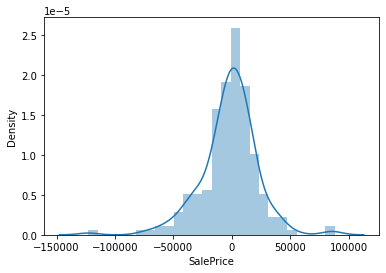

In [121]:
sns.distplot(y_eval-y_pred) 

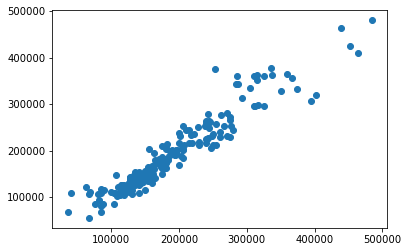

In [122]:
plt.scatter(y_eval, y_pred)

In [129]:
#stacked model(New to me and so cool)
#optimized using gradient boost

from mlxtend.regressor import StackingCVRegressor
stack_reg = StackingCVRegressor(regressors=(xgboost, lr, random_forest,
                                           lasso, ridge, en, gbr),
                               meta_regressor=gbr,
                               use_features_in_secondary=True)
stack_reg.fit(X_train, y_train)

#eval
y_pred = stack_reg.predict(X_eval)
print('Eval')
print(rmse_cv(stack_reg, X_eval, y_pred).min())
print(mean_absolute_error(y_eval, y_pred))

#test
y_final_pred = stack_reg.predict(X_test)
print('Test')
print(rmse_cv(stack_reg,X_test, y_final_pred).min())
print(mean_absolute_error(y_test, y_final_pred))

Eval
10551.176035740862
16289.297460688116
Test
7844.2895637903275
17872.372992528723


In [130]:
accuracy=cross_val_score(estimator=stack_reg, X=X_train, y=y_train, cv=10)
print(f'Accuracy:{accuracy.mean()*100}%')
print(f'Standard Deviation:{accuracy.std()*100}%')

Accuracy:84.13107863836633%
Standard Deviation:7.429183491622582%


C:\Users\lenovo\anaconda31\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

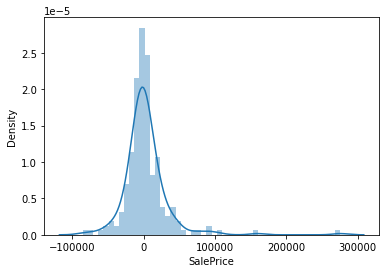

In [131]:
sns.distplot(y_test-y_final_pred) 

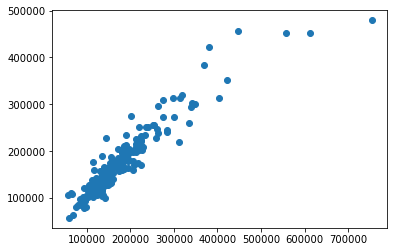

In [132]:
plt.scatter(y_test, y_final_pred)

In [98]:
# Blend models in order to make the final predictions more robust to overfitting
#Stacking-type ensemble where the meta-model is trained on out-of-fold
#predictions made during k-fold cross-validation.

blend_predictions=(0.05* en.predict(X_test)) + \
            (0.025 * lasso.predict(X_test)) + \
            (0.135 * random_forest.predict(X_test)) + \
            (0.025 * lr.predict(X_test)) + \
            (0.48 * gbr.predict(X_test)) + \
            (0.13 * xgboost.predict(X_test)) + \
            (0.03 * ridge.predict(X_test)) + \
            (0.125 * stack_reg.predict(X_test))

TypeError: 'numpy.ndarray' object is not callable

C:\Users\lenovo\anaconda31\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

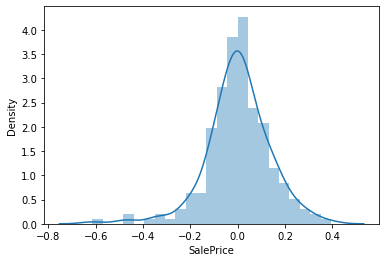

In [99]:
sns.distplot(y_test-blend_predictions) 

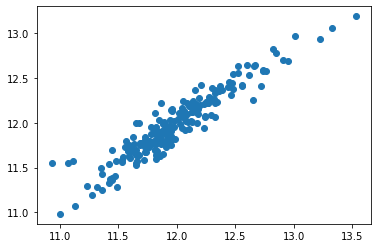

In [100]:
plt.scatter(y_test, blend_predictions)

In [ ]:
print('Test')
#print(rmse_cv(blend_predictions).min())
print(mean_absolute_error(y_test, blend_predictions))

In [ ]:
# blending
# Stacking-type ensemble where the meta-model is trained on predictions made on
#a holdout dataset.

In [ ]:
from numpy import hstack
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

#getting a list of base models
def get_models():
    models = list()
    models.append(('lr', LinearRegression()))
    models.append(('lasso', Lasso(alpha=0.05)))
    models.append(('ridge', Ridge(alpha=19.05)))
    models.append(('en', ElasticNet(alpha=0.001, l1_ratio=0.49)))
    models.append(('rfr', RandomForestRegressor()))
    models.append(('gbr', GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)))
    return models


#fit the blending ensemble
def fit_ensemble(models, X_train, y_train, X_eval, y_eval):
    #fitting on training and predicting on hold out set
    meta_X = list()
    get_models()
    for name, model in models:
        #fiting the training
        model.fit(X_train, y_train)
        #predicting on hold out set
        yhat = model.predict(X_eval)
        #reshaping pred into a matrix with one column
        yhat = yhat.reshape(len(yhat), 1)
        #store pred as input for blending
        meta_X.append(yhat)

    #create 2-D array for pred, each set is an input feature
    meta_X = hstack(meta_X)

    #define blending model
    blender = ElasticNet()
    #fit on pred from base models
    blender.fit(meta_X, y_eval)
    return blender

#making a pred with blender ensemble
def predict_ensemble(models, blender, X_test):
    #making pred with base models
    meta_X = list()
    for name, model in models:
        yhat = model.predict(X_test)
        yhat = yhat.reshape(len(yhat),1)
        meta_X.append(yhat)
    meta_X = hstack(meta_X)
    #predict
    return blender.predict(meta_X)

models = get_models()
blender = fit_ensemble(models, X_train, y_train, X_eval, y_eval)
yhat = predict_ensemble(models, blender, X_test)
print('Test')
#print(rmse_cv(blend_predictions).min())
print(mean_absolute_error(y_test, yhat))

In [134]:
#getting our test dataset for future deployment

test = pd.DataFrame(X_test, columns=X_test.columns)
test.set_index('LotFrontage', inplace=True)
test.to_csv('house_test.csv')
test.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,1stFlrSF,...,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf
LotFrontage,,,,,,,,,,,,,,,,,,,,,
11.075942,8.748961,5,1963,1963,3,4,4,4,4,5.294551,...,0,0,0,0,0,0,0,0,1,0
11.001498,8.613818,5,1959,1959,3,4,4,4,0,5.297416,...,0,0,0,0,1,0,0,0,0,0
10.619362,9.665594,5,1968,2003,3,4,4,4,0,5.431583,...,0,0,0,0,0,0,0,0,0,1
13.007539,9.535383,5,1960,2006,3,1,3,2,4,5.529636,...,0,1,0,0,0,0,0,1,0,0
10.774262,9.018834,6,1920,2000,3,4,4,0,2,5.006549,...,0,0,0,1,0,0,0,0,0,1


In [133]:
import pickle
## saving the model
with open('model.bin', 'wb') as f_out:
    pickle.dump(gbr, f_out)
    f_out.close()

In [ ]:
#deploying the model

* Start a flask Project.

* Set up a dedicated env with dependencies installed (pandas, numpy, flask,
  gunicorn)
* Create a quick flask app to set a simple endpoint.

* Def a function that accepts data from the POST request and return pred
using a helper function

* Test the endpoint using requests package